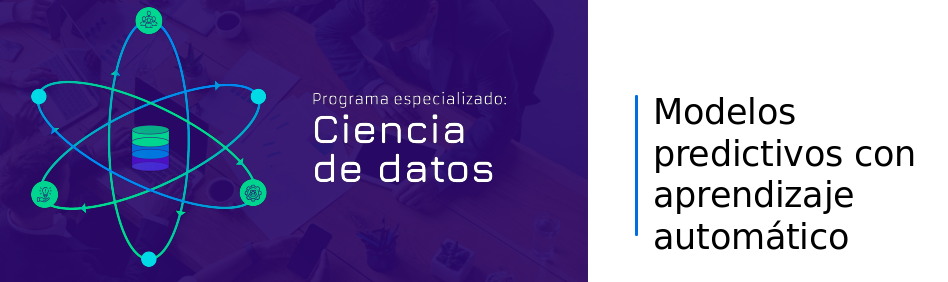

## L4: Herramientas de aprendizaje automático en Python
El objetivo de este notebook es mostrar cómo utilizar las funcionalidades de las librerías en Python para la exploración de un conjunto de datos. Se explicará, paso a paso, como:
1. Cargar un conjunto de datos. 
2. Describir o perfilar los datos mediante estadística descriptiva.
3. Visualizar variables a través de diferentes tipos de gráficos.

El ejemplo que será utilizado, de acuerdo con el caso de uso del sector retail, está relacionado con ventas de vehículos.

Además, puedes utilizar este notebook como guía para la solución de los problemas que se propongan en los ejercicios prácticos y para el proyecto.

###### Autores: David Ocampo (d.ocampo@uniandes.edu.co), Julián Montoya (jc.montoyar@uniandes.edu.co)

### 1. Cargar los datos
A través de la librería **pandas** podemos realizar la carga de datos desde diferentes fuentes de información, en este caso se realizará la carga de un archivo plano csv (archivo separado por comas).

In [1]:
# Primero debemos importar la librería pandas
import pandas as pd
# A continuación, se cargan los datos
data=pd.read_csv(r'C:\Users\Usuario\Documents\CIENCIA DE DATOS\REPOSITORIO GITHUB\MODELOS PREDICTIVOS CON ML PYTHON ejercicios\1. Ejercicio regresión vehículos\Vehiculos_Dataset.csv',sep=';')

In [2]:
# Para tener un primer acercamiento a los datos podemos mostrar las cinco primeras filas
data.head()

referencia  modelo  precio  kilometraje combustible  \
0        Maruti Swift Dzire VDI    2014  450000       145500      Diesel   
1  Skoda Rapid 1.5 TDI Ambition    2014  370000       120000      Diesel   
2      Honda City 2017-2020 EXi    2006  158000       140000      Petrol   
3     Hyundai i20 Sportz Diesel    2010  225000       127000      Diesel   
4        Maruti Swift VXI BSIII    2007  130000       120000      Petrol   

    propietario   motor  poder_maximo  asientos  
0   First Owner  1248.0         74.00       5.0  
1  Second Owner  1498.0        103.52       5.0  
2   Third Owner  1497.0         78.00       5.0  
3   First Owner  1396.0         90.00       5.0  
4   First Owner  1298.0         88.20       5.0

In [3]:
# Además podemos conocer el tamaño de nuestros datos
data.shape

(8115, 9)

### 2. Describir los datos
Ahora podemos hacer una descripción más detallada de nuestros datos.Ten en cuenta que este paso es muy importante para poder determinar problemas de calidad de datos. Además, nos dará información que será útil en la fase de preparación de datos.

In [4]:
# Se realiza el perfilamiento de los datos. En este, se genera información de tipo descriptivo para cada una de las 
# variables numéricas.
data.describe()

modelo        precio   kilometraje        motor  poder_maximo  \
count  8115.000000  8.115000e+03  8.115000e+03  7894.000000   7893.000000   
mean   2013.796919  6.300252e+05  6.989409e+04  1457.024956     91.354989   
std       4.043413  7.757624e+05  5.656325e+04   502.169991     35.201186   
min    1983.000000  2.999900e+04  1.000000e+00   624.000000     32.800000   
25%    2011.000000  2.524995e+05  3.500000e+04  1197.000000     68.050000   
50%    2015.000000  4.500000e+05  6.000000e+04  1248.000000     82.000000   
75%    2017.000000  6.750000e+05  9.800000e+04  1582.000000    102.000000   
max    2020.000000  5.850000e+06  2.360457e+06  3604.000000    282.000000   

          asientos  
count  7894.000000  
mean      5.417659  
std       0.959590  
min       2.000000  
25%       5.000000  
50%       5.000000  
75%       5.000000  
max      14.000000

Esta información ya nos permite decir algo de nuestros datos. Por ejemplo, que la media observada de la variable "kilometraje" es  es 69894,41. O que el número de "asientos" está entre 2 y 14.

In [5]:
# Con respecto a la variable categórica "combustible", podríamos ver cualés categorías se presentan y en qué proporción.
pd.value_counts(data['combustible'])

Diesel    4394
Petrol    3626
CNG         57
LPG         38
Name: combustible, dtype: int64

Podemos observar que la moda de la variable (valor más frecuente) es "Diesel".

In [6]:
# Con respecto a la variable categórica "propietario", obtenemos estos resultados
pd.value_counts(data['propietario'])

First Owner             5281
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Name: propietario, dtype: int64

### 3. Visualizar los datos
También podemos generar gráficos que nos permitan entender características de los datos. Los gráficos son
representaciones pictóricas de los datos y se utilizan para facilitar la comprensión e interpretación de información estadística.



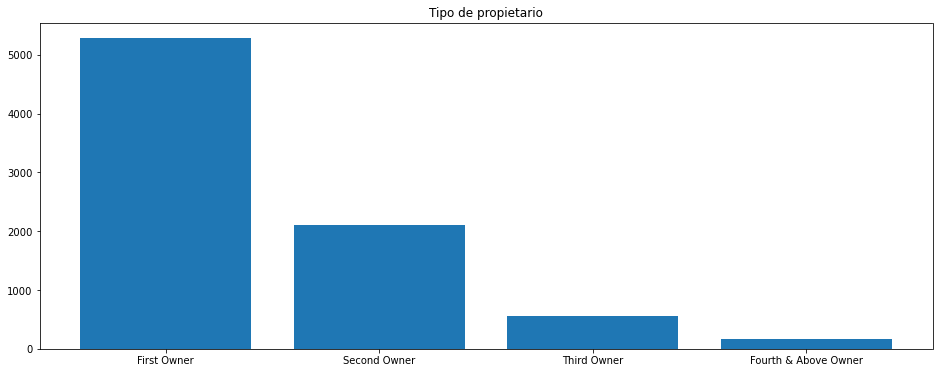

In [7]:
# Por ejemplo, podemos generar un gráfico de barras para la variable categórica nombre-categoria_producto 
# Para esto importamos la libreria a matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
plt.bar(data['propietario'].unique(),data['propietario'].value_counts())  
plt.title('Tipo de propietario')  
plt.show()

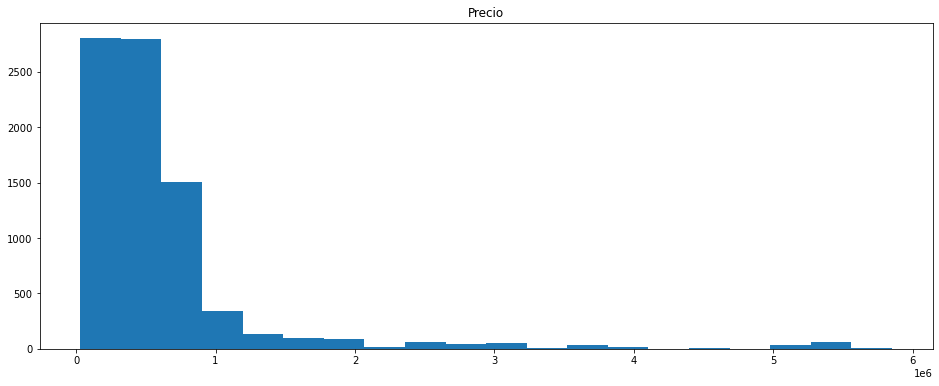

In [8]:
# También podríamos ver el histograma de alguna variable numérica como el precio.
plt.figure(figsize=(16,6))
plt.hist(data['precio'], bins=20)
plt.title('Precio')  
plt.show()

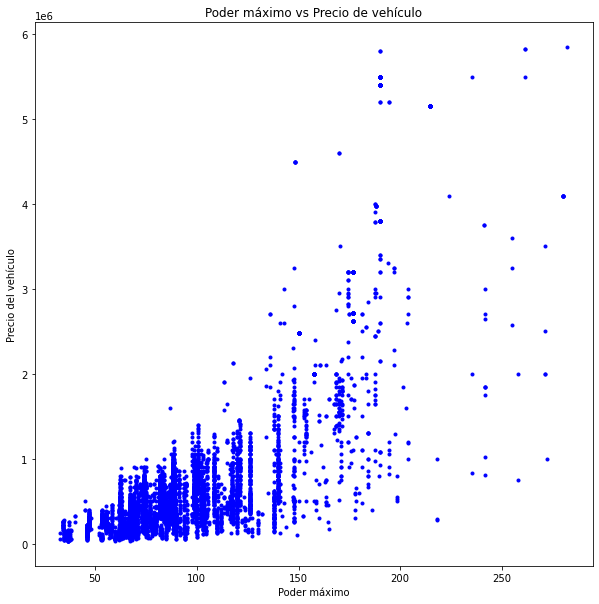

In [9]:
# Otro gráfico que podemos generar es uno de dispersión, que nos permitirá ver la relación entre dos variables.
plt.figure(figsize=(10,10))
plt.plot(data['poder_maximo'],data['precio'],'.', color='blue')
plt.title('Poder máximo vs Precio de vehículo')
plt.xlabel('Poder máximo')  
plt.ylabel('Precio del vehículo')  
plt.show()

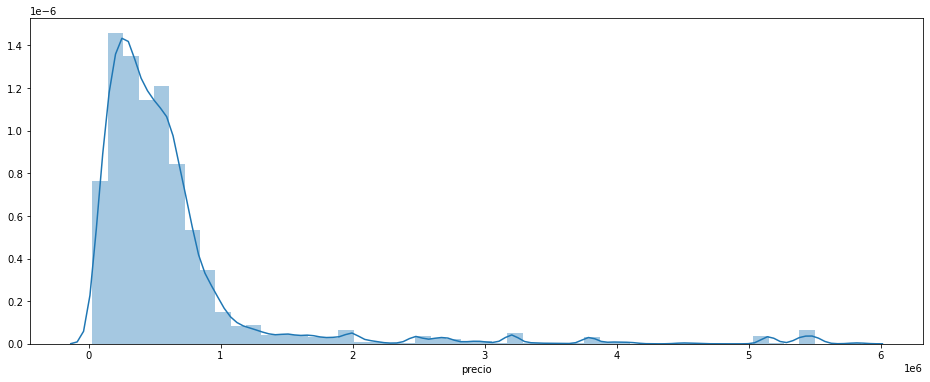

In [10]:
# Otra librería que podemos utilizar para graficar es seaborn.  
import seaborn as sns
plt.figure(figsize=(16,6))
plt.tight_layout()
sns.distplot(data['precio'])

Para terminar, hay un módulo de pandas que puedes utilizar para obtener un reporte completo del conjunto de datos, llamado pandas-profiling. Primero tienes que realizar su instalación. Una opción es hacerlo con esta línea de comando:
pip install -U pandas-profiling[notebook]

In [11]:
# Para poder utilizarlo ahora tienen que realizar la importación
import pandas_profiling
# Y ahora puede generar el reporte de los datos
pandas_profiling.ProfileReport(data)

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

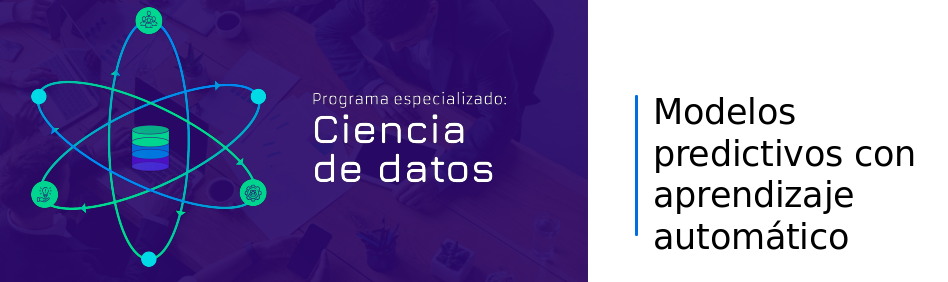